# Wine quality analysis with decision trees

The file `wine_quality.csv` contains information about chemical properties of some wines. Let's see if what we learned so far can help us to predict if a wine will be good based on its properties.

## Load, examine, clean, prepare

In [16]:
# Read and parse the wine_quality.csv file.
import pandas as pd
data = pd.read_csv("wine_quality.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
# How many rows and columns does the dataset have ?
rows = data.shape[0]
columns = data.shape[1]
print("the dataset have",rows,"rows and",columns,"columns")

the dataset have 6497 rows and 13 columns


In [18]:
# List all chemical properties of this dataset.
print ("The chemical properties of this dataset are :")
for column in data.columns:
    print(column)


The chemical properties of this dataset are :
type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [19]:
# What kind of wines are present in this dataset ?
print ("The kind of wines present in this dataset are :")
for kind in data['type'].unique():
    print (kind)

The kind of wines present in this dataset are :
white
red


In [20]:
# Find the right method to get the average/minimum/maximum value
# of each column (and only these 3 information per column)
#data.describe()
data.describe().loc[['mean', 'min', 'max']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [21]:
# Does this dataset have any missing information ?
 # Answer : yes beacause data.isnull().sum() shows that the corresponding count of some columns is greater than zero.
 #fixed acidity 10>0 ; volatile acidity 8 >0; citric acid 3>0;....     
# How many missing values ?
# Which column has the most missing values ?
missing_values = data.isna().sum()
total_missing_values = data.isna().sum().sum()
print("Total number of missing values:", total_missing_values)
print("Column with the most missing values:", missing_values.idxmax())
missing_values

Total number of missing values: 38
Column with the most missing values: fixed acidity


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [22]:
# Remove the rows which have at least 1 missing value.
# How many rows have been removed ?
data = data.dropna(axis='index')
#verification
#data_no_missing_values.isna().sum()
rows_no_missing_values = data.shape[0]
print("Number of rows removed having at least 1 missing value:", rows - rows_no_missing_values)
data

Number of rows removed having at least 1 missing value: 34


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


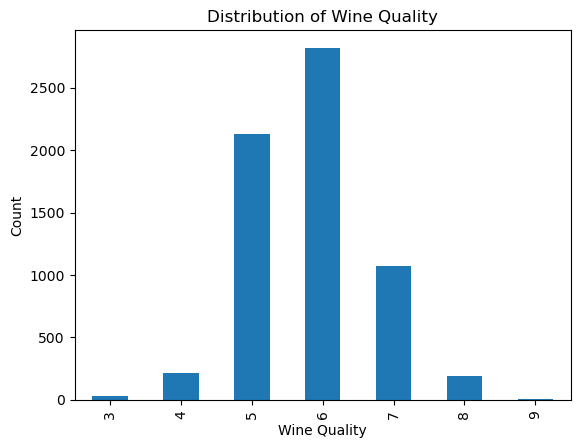

In [23]:
# Use an histogram to see the repartition of
# the wine quality.
import matplotlib.pyplot as plt

hist = data.quality.value_counts().sort_index()
hist.plot(kind="bar")
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

In [26]:
# Let's consider that a wine is good if its quality is
# at least 7. Replace the values in the "quality" column
# with "good" if quality >= 7 and with "not good" otherwise.
import numpy as np

data['quality'] = np.where(data['quality'] >= 7, 'good', 'not good')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,not good
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,not good
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,not good
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not good
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,not good
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,not good
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,not good
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,not good


In [27]:
# Create the input data (i.e. the properties) and the
# label (i.e. the quality of wine) and assign them
# to 2 different variables X and y. Our machine learning
# algorithm needs to have both input and output data.

X = data.drop('quality', axis=1) 
y = data['quality']

In [66]:
# Separate your data into a training and a test set
# with 80% for the training set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

## Predicting wine quality with a decision tree

In [67]:
# Is this a classification or a regression problem ?
 # Answer: this is a classification problem,It is about predicting discrete categories (good, not good)  
# Import the appropriate version of DecisionTree, then
# train it with your training data.
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=6)

# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'white'

In [68]:
# Oops, it seems that there is a problem! Indeed, most
# machine learning algorithms only work with numerical vectors.
# And our current training data still have some string values
# (like the type or the quality). We need to transform them before
# training our model.

# sklearn comes with tools to transform non-numerical values.
# In our case, we are going to use a LabelEncoder. Look at the
# documentation to learn what is does.

#LabelEncoder?
from sklearn.preprocessing import LabelEncoder

# now create two encoders: one for the `type` in X, the other
# for the `quality` in y. Use the trained encoders to transform
# X_train, X_test, y_train and y_test.
type_encoder = LabelEncoder()
quality_encoder = LabelEncoder()

type_encoder.fit(X['type'])
quality_encoder.fit(y)

X_train['type'] = type_encoder.transform(X_train['type'])
X_test['type'] = type_encoder.transform(X_test['type'])

# Fit and transform 'quality' in y_train and y_test
y_train = quality_encoder.transform(y_train)
y_test = quality_encoder.transform(y_test)

In [69]:
# Now train again your Decision Tree.
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=6)

In [71]:
# What is the accuracy of your model (both on training
# and test sets) ? Do you think we are underfitting ? Overfitting ?
 # Answer: the model is overfitting because the model's performance on the training set is perfect and it isn't on the test set
# Evaluate the accuracy of the classifier on the training set
accuracy_train = decision_tree_classifier.score(X_train, y_train)
print("Accuracy on training set:", accuracy_train)

# Evaluate the accuracy of the classifier on the test set
accuracy_test = decision_tree_classifier.score(X_test, y_test)
print("Accuracy on test set:", accuracy_test)

Accuracy on training set: 1.0
Accuracy on test set: 0.8375870069605569


In [97]:
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy
# you obtain?

# Adjust the ranges for hyperparameters
rg_max_depth = range(3, 10)
rg_min_samples_split = range(5, 50,5)
rg_max_features = range(2, X_train.shape[1])

best_parametres = {}
best_accuracy = 0
for depth in rg_max_depth:
    for sample in rg_min_samples_split:
        for feature in rg_max_features:
            decision_tree = DecisionTreeClassifier(max_depth=depth,min_samples_split=sample,max_features=feature,random_state=6)
            decision_tree.fit(X_train, y_train)
            accuracy = decision_tree.score(X_test, y_test)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parametres["depth"] = depth
                best_parametres["sample"] = sample
                best_parametres["feature"] = feature

print("Best accuracy obtained :",best_accuracy)
print("max_depth :", best_parametres["depth"])
print("min_samples_split :", best_parametres["sample"])
print("max_features :", best_parametres["feature"])

Best accuracy obtained : 0.8499613302397525
max_depth : 9
min_samples_split : 5
max_features : 6


In [99]:
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the quality of a wine?

# Create a DataFrame to display features and their importances
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': decision_tree_classifier.feature_importances_ })

# Sort the DataFrame by importance in descending order
important_features = features.sort_values(by='Importance', ascending=False)

print("the three most important features to evaluate the quality of a wine :")
important_features.head(3)

the three most important features to evaluate the quality of a wine :


,Feature,Importance
11,alcohol,0.214926
2,volatile acidity,0.088220
4,residual sugar,0.088189


## Predicting wine quality with random forests

We saw in the course (and in this example) that Decision Trees can easily overfit. To prevent this, we can use Random forests instead. Random forests are a collection of decision trees, where each decision tree is trained differently. The prediction of the RandomForest is then the average (or the most frequent) prediction of all the decision trees.

In [100]:
# Use a RandomForest composed of 20 decision trees and
# train it on your data. Evaluate its accuracy.
# Do you see an improvement ?
# Answer: There is an improvment.
# Justification: The train accuracy has decreased (0.997-->1.0) and the test accuracy has increased (0.837-->0.872).
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=20, random_state=6)
random_forest.fit(X_train, y_train)

accuracy_train = random_forest.score(X_train, y_train)
accuracy_test = random_forest.score(X_test, y_test)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

Accuracy on Training Set: 0.997872340425532
Accuracy on Test Set: 0.8723897911832946


In [102]:
# Train other random forest classifiers with different
# hyperparameters (n_estimators, max_features). Can you beat
# the best accuracy you obtained with a single decision tree ?
#Answer: yes we can beat it,the best accuracy obtained with RandomForest is heigher than the one obtained with DecisionTree 
#(0.849-->0.879)
rg_n_estimators = [10, 20, 30, 40, 50, 75, 100, 150]
rg_max_depth = [5,10,15,20]
rg_max_features = [5, 10, 15]

best_parametres = {}
best_test_accuracy = 0

for estimator in rg_n_estimators:
    for depth in rg_max_depth:
        for feature in rg_max_features:
            forest = RandomForestClassifier(n_estimators=estimator,max_depth=depth,max_features=feature,random_state=6)
            forest.fit(X_train, y_train)
            accuracy = forest.score(X_test, y_test)            
            if accuracy > best_test_accuracy:
                best_test_accuracy = accuracy
                best_parametres["estimator"] = estimator
                best_parametres["depth"] = depth
                best_parametres["feature"] = feature

print("Best accuracy obtained :",best_test_accuracy)                
print("n_estimators :", best_parametres["estimator"])
print("max_depth :", best_parametres["depth"])
print("max_features :", best_parametres["feature"])

Best accuracy obtained : 0.8793503480278422
n_estimators : 75
max_depth : 20
max_features : 5
